## Import

In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import scipy.stats as stats
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

## color and saving

In [2]:
color = "#9a3324"

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/example_zoomed_in_tracks"
os.chdir(folder_save)

fname_save_prefix = "zoomed_in_RNA_track-constrained-1"
switch_read_from_file = False

## Raw data from file

In [11]:
if switch_read_from_file:
    df_load = pd.read_csv(fname_save_prefix + "-data.csv")
    t = df_load[df_load["variable"] == "t_s"]["value"].to_numpy(dtype=float)
    x = df_load[df_load["variable"] == "x_nm"]["value"].to_numpy(dtype=float)
    y = df_load[df_load["variable"] == "y_nm"]["value"].to_numpy(dtype=float)
    MSD = df_load[df_load["variable"] == "MSD_um2"]["value"].to_numpy(dtype=float)
    tau = df_load[df_load["variable"] == "tau_s"]["value"].to_numpy(dtype=float)
    length = MSD.shape[0]
    half_length = round(length / 2)

## Filtering and find track

In [3]:
df = pd.read_csv("SPT_results_AIO_concat-0Dex_noTR_0hr.csv")

In [4]:
df.astype(
    {
        "N_steps": int,
        "max_d_anytwo_nm": float,
        "alpha": float,
        "linear_fit_log10D": float,
        "linear_fit_log10D": float,
        "linear_fit_R2": float,
    }
)
df_static = df[
    (df["max_d_anytwo_nm"] < 100) & (df["N_steps"] > 50) & (df["linear_fit_R2"] < 0.5)
].sort_values(by="max_d_anytwo_nm", ascending=True)

df_constrained = df[
    (df["max_d_anytwo_nm"] > 300)
    & (df["alpha"] < 0.5)
    & (df["N_steps"] > 50)
    & (df["linear_fit_R2"] < 0.7)
].sort_values(by="max_d_anytwo_nm", ascending=True)

df_free = df[
    (df["max_d_anytwo_nm"] > 200)
    & (df["alpha"] > 0.95)
    & (df["N_steps"] > 8)
    & (df["linear_fit_R2"] > 0.99)
].sort_values(by="max_d_anytwo_nm", ascending=False)

In [26]:
idx = 0

filename SPT_results_AIO-20230626-FL_noTR_noDex_20ms_0hr_replicate1_FOV-7-RNAs.csv
mean_x_pxl 9.738369601051929
mean_y_pxl 329.7315186417467
N_steps 92
max_d_anytwo_nm 310.10313443643304
alpha 0.15514451676857
log10D -3.2203668023522845
R2 0.3467886198808379
idx 8


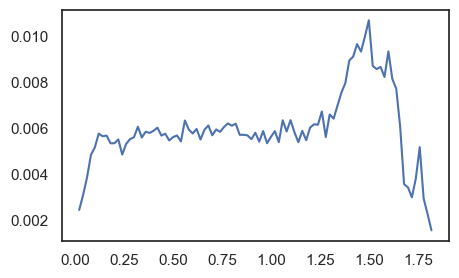

In [35]:
df_from = df_constrained
nm_per_pxl = 117
s_per_frame = 0.02

x = np.fromstring(df_from.iloc[idx]["list_of_x"][1:-1], sep=", ")
y = np.fromstring(df_from.iloc[idx]["list_of_y"][1:-1], sep=", ")
t = np.fromstring(df_from.iloc[idx]["list_of_t"][1:-1], sep=", ")
MSD = np.fromstring(df_from.iloc[idx]["list_of_MSD_um2"][1:-1], sep=", ")
tau = np.fromstring(df_from.iloc[idx]["list_of_tau_s"][1:-1], sep=", ")
print("filename", str(df_from.iloc[idx]["filename"]))
print("mean_x_pxl", str(df_from.iloc[idx]["mean_x_pxl"]))
print("mean_y_pxl", str(df_from.iloc[idx]["mean_y_pxl"]))
print("N_steps", str(df_from.iloc[idx]["N_steps"]))
print("max_d_anytwo_nm", str(df_from.iloc[idx]["max_d_anytwo_nm"]))
print("alpha", str(df_from.iloc[idx]["alpha"]))
print("log10D", str(df_from.iloc[idx]["linear_fit_log10D"]))
print("R2", str(df_from.iloc[idx]["linear_fit_R2"]))
x = (x - (x.min() + x.max()) / 2) * nm_per_pxl
y = (y - (y.min() + y.max()) / 2) * nm_per_pxl
t = (t - t[0]) * s_per_frame

print("idx", idx)
idx += 1

plt.figure(figsize=(5, 3))
plt.plot(tau, MSD)
plt.show()

## Plot MSD-tau

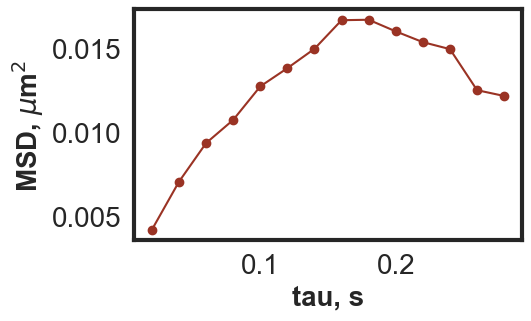

In [21]:
halflength = round(tau.shape[0] / 2)
plt.figure(figsize=(5, 3))
plt.plot(
    tau[: halflength - 14],
    MSD[: halflength - 14],
    color=color,
    ls="-",
    marker="o",
)
plt.gca().spines[:].set_linewidth(3)
plt.gca().tick_params(axis="both", which="major", labelsize=20)
plt.xlabel("tau, s", weight="bold", fontsize=20)
plt.ylabel(r"MSD, $\mu$m$^{2}$", weight="bold", fontsize=20)
# plt.savefig(
#     fname_save_prefix + "-MSDtau.png", format="png", dpi=300, bbox_inches="tight"
# )
plt.show()

## Save data for replot

In [71]:
if not switch_read_from_file:
    value = np.concatenate([t, x, y, MSD, tau])
    variable = np.concatenate(
        [
            np.repeat("t_s", t.shape[0]),
            np.repeat("x_nm", x.shape[0]),
            np.repeat("y_nm", y.shape[0]),
            np.repeat("MSD_um2", MSD.shape[0]),
            np.repeat("tau_s", tau.shape[0]),
        ]
    )
    df_save = pd.DataFrame(
        {
            "variable": variable,
            "value": value,
        },
        dtype=object,
    )
    df_save.to_csv(fname_save_prefix + "-data.csv", index=False)

# Plot RNA track

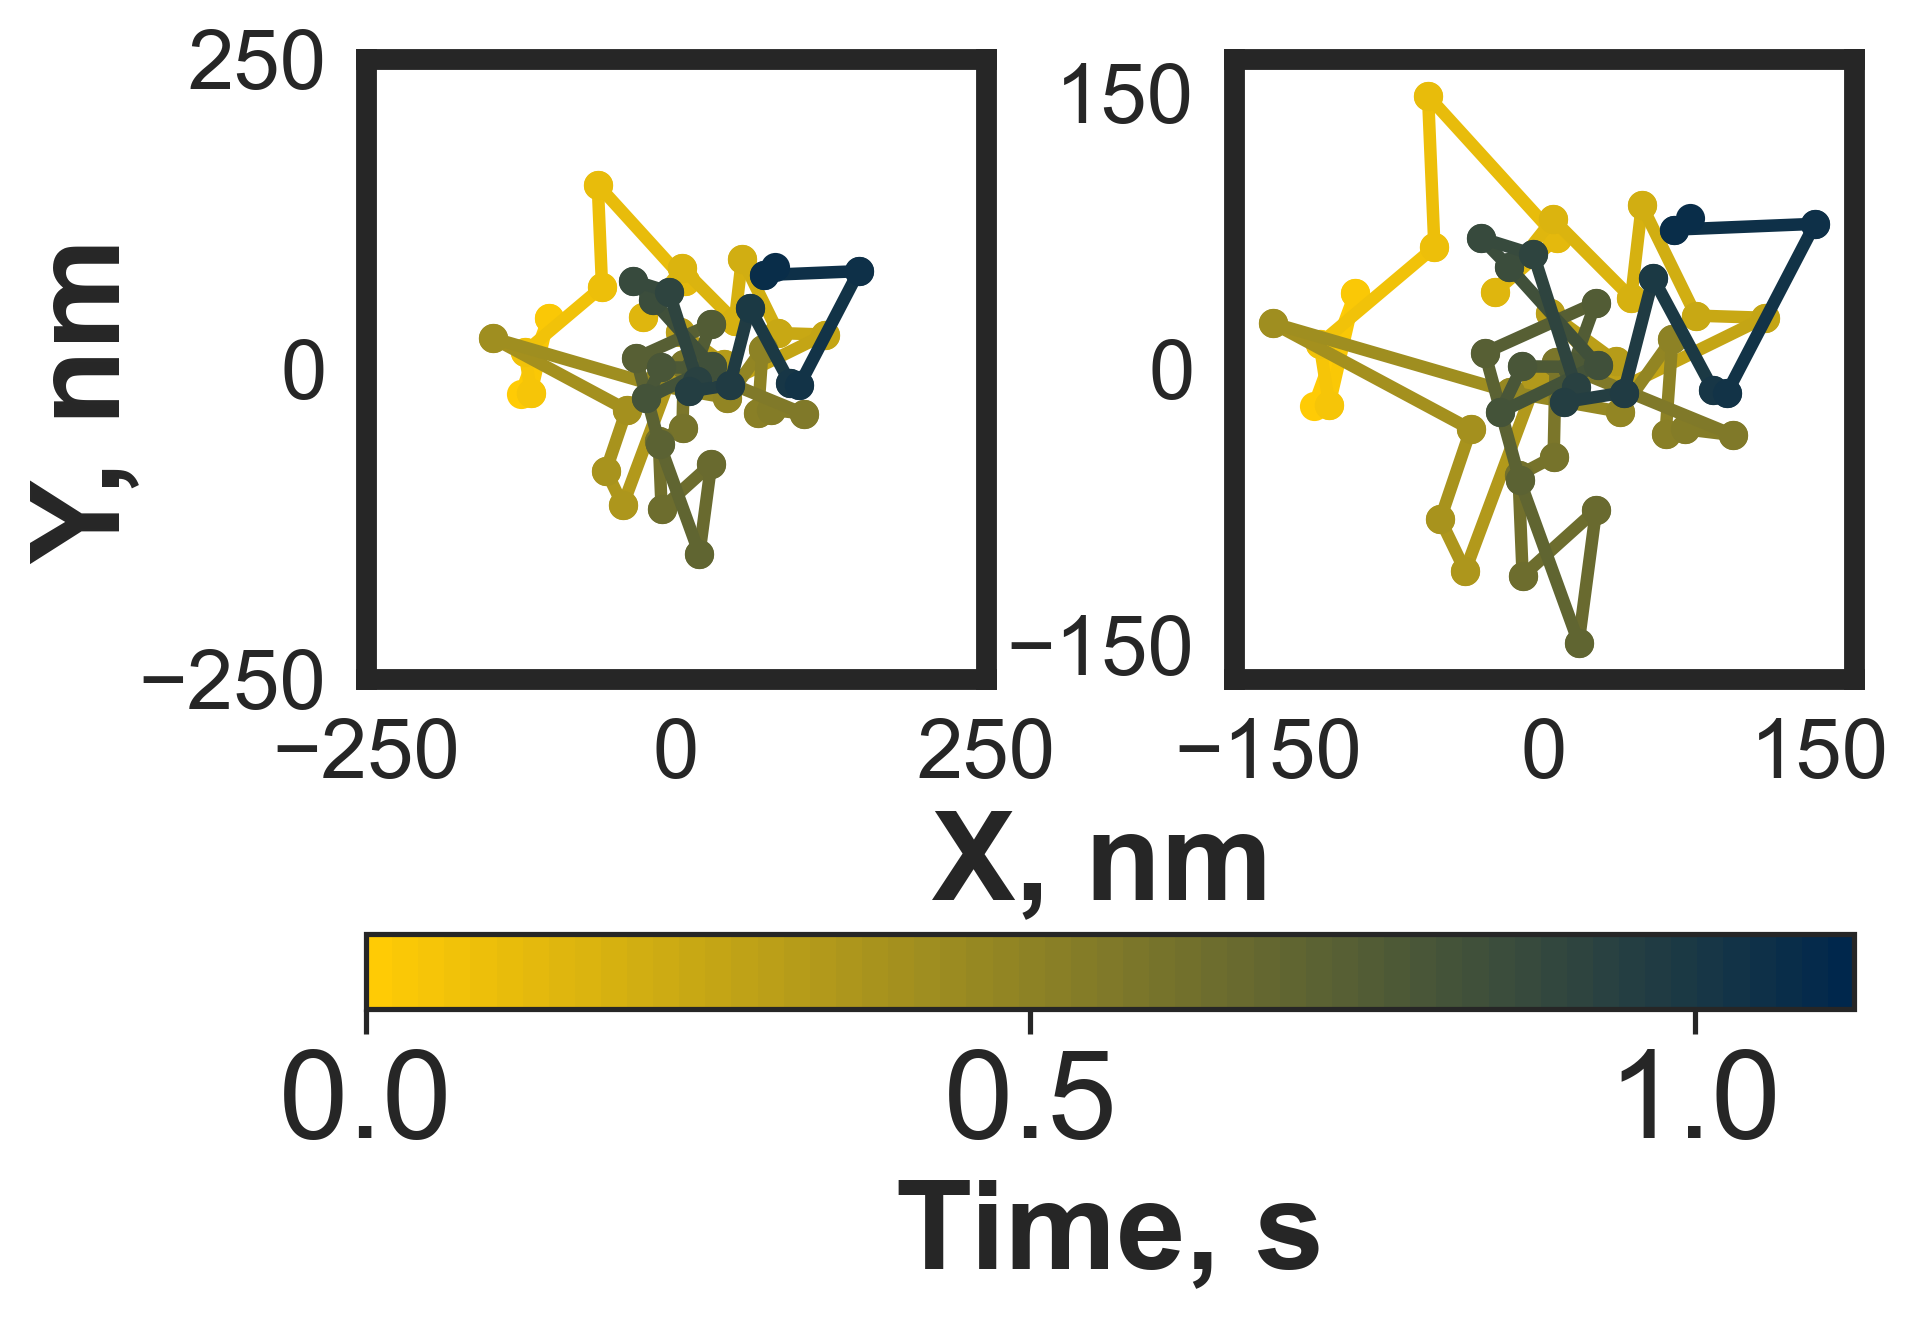

In [22]:
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=x.shape[0]
)

# Adjust track
x_plot = x[:-5]
y_plot = y[:-5]
t_plot = t[:-5]
x_plot = x_plot - (x_plot.min() + x_plot.max()) / 2
y_plot = y_plot - (y_plot.min() + y_plot.max()) / 2

# fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=300)
fig = plt.figure(dpi=300)
gs = fig.add_gridspec(1, 2, wspace=0.4)
axs = gs.subplots()
for i in range(len(t_plot) - 1):
    axs[0].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )
for i in range(len(t_plot) - 1):
    axs[1].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )

# tick number and sizes
for i in range(2):
    axs[i].axis("scaled")
    axs[i].spines[:].set_linewidth(5)
    axs[i].tick_params(axis="both", which="major", labelsize=20)

xy_max = np.max([x_plot.max(), y_plot.max()]) + 20
axs[1].set_xlim(-xy_max, xy_max)
axs[1].set_ylim(-xy_max, xy_max)
axs[1].xaxis.set_major_locator(MaxNLocator(3))
axs[1].yaxis.set_major_locator(MaxNLocator(3))
xy_fix = 500
axs[0].set_xlim(-xy_fix / 2, xy_fix / 2)
axs[0].set_ylim(-xy_fix / 2, xy_fix / 2)
axs[0].set_xticks([-xy_fix / 2, 0, xy_fix / 2])
axs[0].set_yticks([-xy_fix / 2, 0, xy_fix / 2])


# color bar
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(t[0], t[-1]), cmap=cmap),
    ax=axs,
    orientation="horizontal",
    pad=0.23,
    drawedges=False,
)
cbar.set_label(label="Time, s", weight="bold", fontsize=30)
cbar.ax.tick_params(labelsize=30)

fig.text(0.42, 0.25, "X, nm", fontsize=30, weight="bold")
fig.text(-0.05, 0.5, "Y, nm", fontsize=30, weight="bold", rotation=90)


# saving
# plt.savefig(
#     fname_save_prefix + "-track-twoscales.png",
#     format="png",
#     dpi=300,
#     bbox_inches="tight",
# )
plt.show()